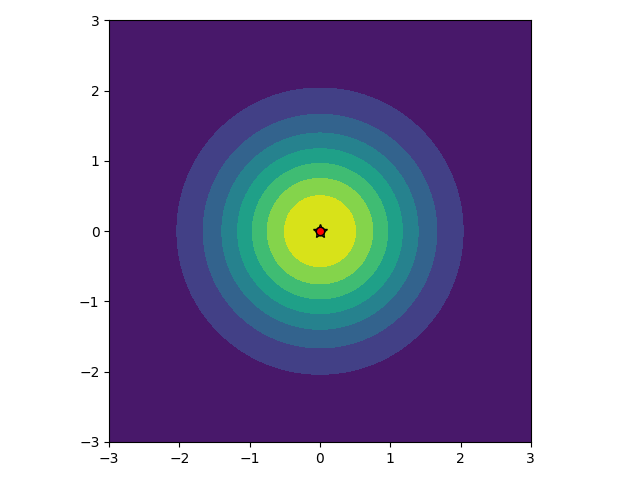

In [19]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Create Gaussian Distribution
random_seed=1000
cov_val = [0]
mean = np.array([0,0])

val = cov_val[0]

cov = np.array([[1, val], [val, 1]])
distr = multivariate_normal(cov = cov, mean = mean,
                            seed = random_seed)
mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = cov[0,0], cov[1,1]

x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
X, Y = np.meshgrid(x,y)

pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

# Vector Math

def sphericalToDir(iTheta, iPhi):
    return np.array([np.cos(iPhi)*np.sin(iTheta), np.sin(iPhi)*np.sin(iTheta), np.cos(iTheta)])

def halfVector(iTheta, iPhi, oTheta, oPhi):
    i = sphericalToDir(iTheta, iPhi)
    o = sphericalToDir(oTheta, oPhi)
    h = i+o
    return h/np.linalg.norm(h)

def toSlopeSpace(half):
    return np.array([half[0]/half[2], half[1]/half[2]])

# Plot slope space

plt.clf()
plt.figure('Slope Space')

ax = plt.subplot(1,1,1, aspect='equal')
ax.contourf(X, Y, pdf, cmap='viridis')
viewDirPoint = ax.plot(0, 0, color='green', marker='o', markeredgecolor='black')
lightDirPoint = ax.plot(0, 0, color='yellow', marker='*', markeredgecolor='black', markersize=10)
halfDirPoint = ax.plot(0, 0, color='red', marker='o', markeredgecolor='black')

plt.tight_layout()
plt.show()

def plotSlopeSpace(viewTheta, viewPhi, lightTheta, lightPhi):
    viewDir = sphericalToDir(viewTheta, viewPhi)
    lightDir = sphericalToDir(lightTheta, lightPhi)
    halfDir = halfVector(viewTheta, viewPhi, lightTheta, lightPhi)

    viewSlope = toSlopeSpace(viewDir)
    viewDirPoint[0].set_xdata([viewSlope[0]])
    viewDirPoint[0].set_ydata([viewSlope[1]])

    lightSlope = toSlopeSpace(lightDir)
    lightDirPoint[0].set_xdata([lightSlope[0]])
    lightDirPoint[0].set_ydata([lightSlope[1]])

    halfSlope = toSlopeSpace(halfDir)
    halfDirPoint[0].set_xdata([halfSlope[0]])
    halfDirPoint[0].set_ydata([halfSlope[1]])
 
# Python Widgets

import ipywidgets
viewTheta = ipywidgets.FloatSlider(description='View Theta', value=0, min=0.0, max=np.pi*0.5, step=0.05, style={'description_width': 'initial'})
viewPhi = ipywidgets.FloatSlider(description='View Phi', value=3.1415, min=0.0, max=np.pi*2.0, step=0.05, style={'description_width': 'initial'})
viewDir = ipywidgets.HBox([viewTheta, viewPhi])

import ipywidgets
lightTheta = ipywidgets.FloatSlider(description='Light Theta', value=0, min=0.0, max=np.pi*0.5, step=0.05, style={'description_width': 'initial'})
lightPhi = ipywidgets.FloatSlider(description='Light Phi', value=0, min=0.0, max=np.pi*2.0, step=0.05, style={'description_width': 'initial'})
lightDir = ipywidgets.HBox([lightTheta, lightPhi])

out = ipywidgets.interactive_output(plotSlopeSpace,
                                    {
                                        'viewTheta': viewTheta,
                                        'viewPhi': viewPhi,
                                        'lightTheta': lightTheta,
                                        'lightPhi': lightPhi,
                                    })
ipywidgets.VBox([viewDir, lightDir, out])


